## **FINM 32000 - HW3**

#### Yumeng Zhang (12372205)

I discussed Problem 1 and 2 with Yitong Li and Qianyu Pan.

In [1]:
import numpy as np

# Problem 1

##### **(a)**

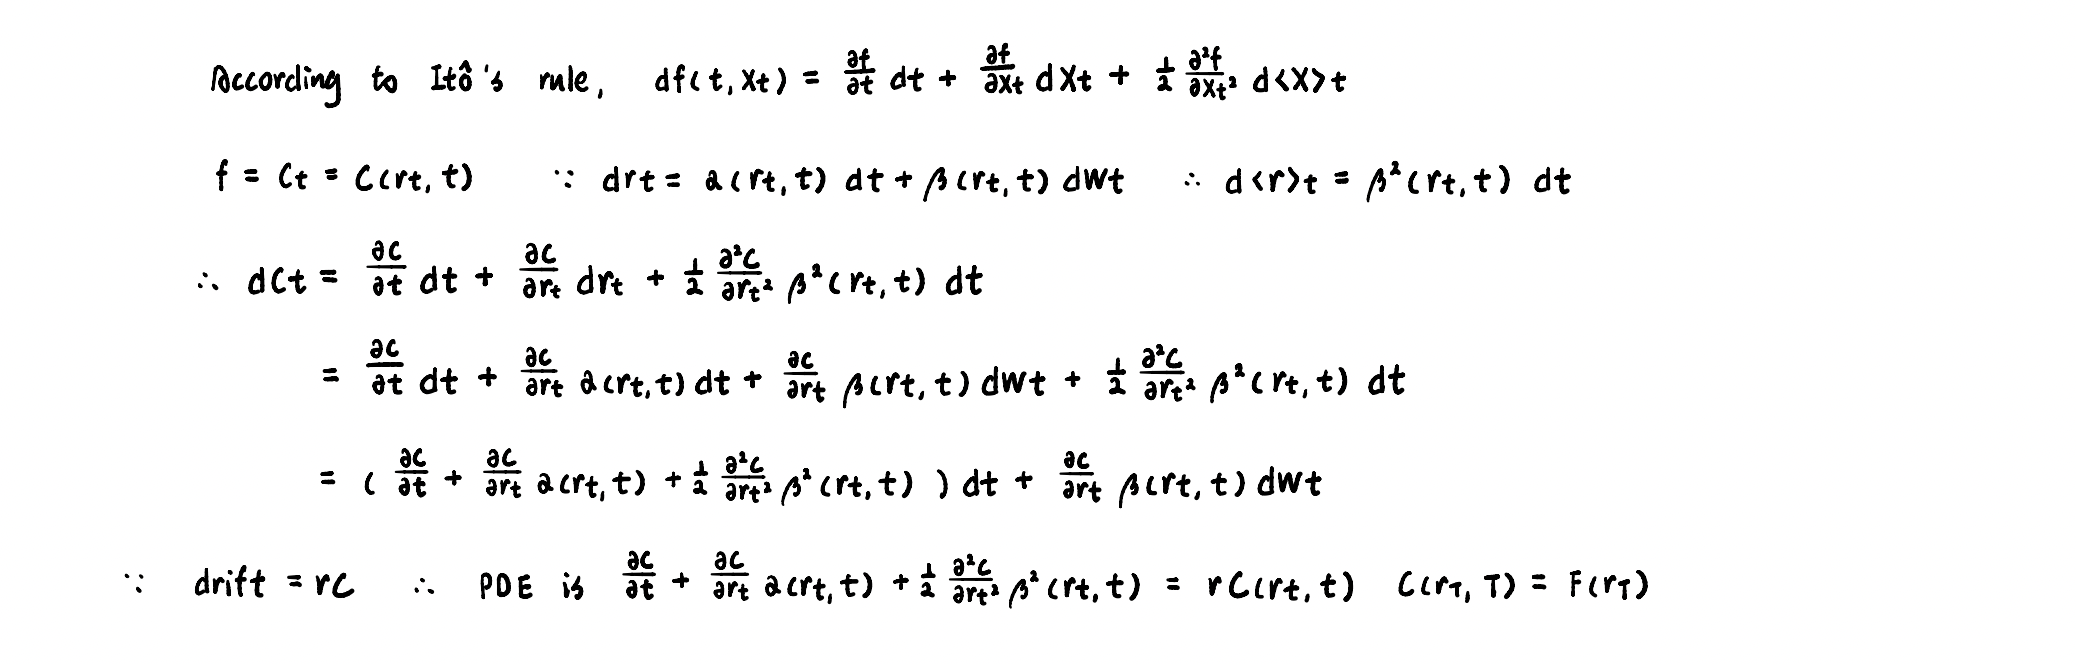

##### **(b)**

Apply a standard central-difference explicit finite difference scheme.

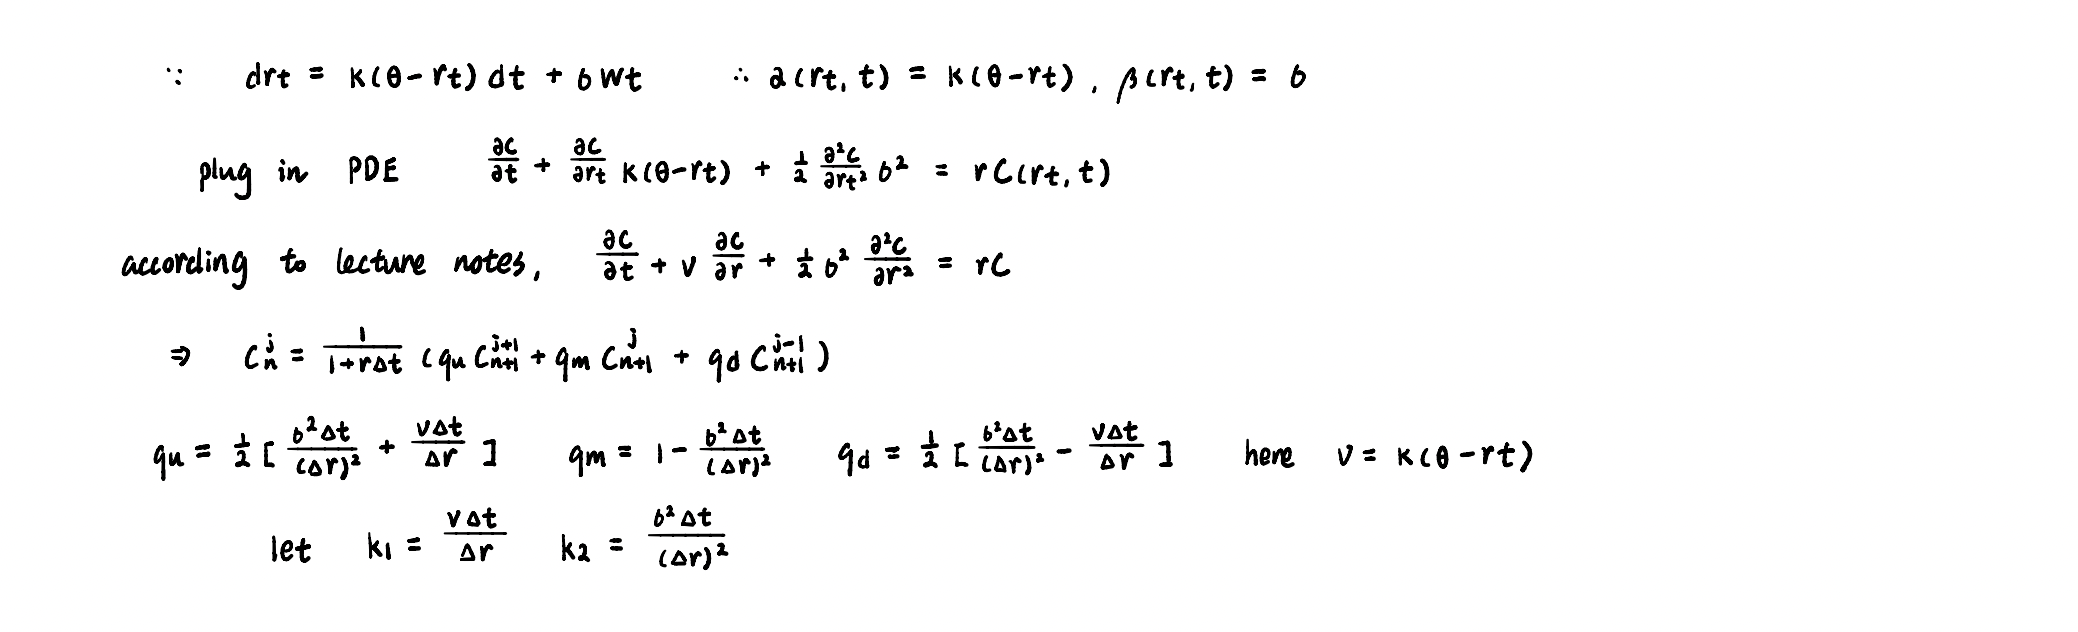

In [17]:
class Vasicek:
    
    def __init__(self,kappa,theta,sigma): 
        self.kappa=kappa
        self.theta=theta
        self.sigma=sigma

In [18]:
hw3dynamics = Vasicek(kappa=3,theta=0.05,sigma=0.03)

In [19]:
class Bond:
    
    def __init__(self, T):
        self.T=T

In [20]:
hw3contract = Bond(T=5)

In [153]:
class FDexplicit:
    
    def __init__(self, rMax, rMin, deltar, deltat, useUpwind):         
        self.rMax=rMax
        self.rMin=rMin
        self.deltar=deltar
        self.deltat=deltat
        self.useUpwind=useUpwind
        
    
    def price_bond_vasicek(self,contract,dynamics):
    # You complete the coding of this function
    #
    # Returns array of all initial short rates,
    # and the corresponding array of zero-coupon
    # T-maturity bond prices

        T = contract.T
        N=round(T/self.deltat)
        if abs(N-T/self.deltat) > 1e-12:
            raise ValueError("Bad delta t")

        r=np.arange(self.rMax,self.rMin-self.deltar/2,-self.deltar)   #I'm making the FIRST indices of the array correspond to HIGH levels of r
        bondprice=np.ones(np.size(r))

        k1 = (dynamics.kappa * (dynamics.theta - r) * self.deltat)/(self.deltar)
        k2 = (dynamics.sigma ** 2 * self.deltat) / self.deltar ** 2
        
        if self.useUpwind:

            qu = 0.5*(k2 + np.maximum(2*k1,0))    #fill this in with an array.
            qd = 0.5*(k2 - np.minimum(2*k1,0))    #fill this in with an array.
            qm = 1-qu-qd                          #fill this in with an array.

        else:

            qu = 0.5*(k2+k1)        #fill this in with an array.
            qd = 0.5*(k2-k1)        #fill this in with an array.
            qm = 1-k2               #fill this in with an array.

        for t in np.arange(N-1,-1,-1)*self.deltat:
            bondprice=1/(1+r*self.deltat)*(qd*np.roll(bondprice,-1)+qm*bondprice+qu*np.roll(bondprice,1))

            # It is not obvious in this case, 
            # what boundary conditions to use at the top and bottom
            # so let us assume "linearity" boundary conditions
            bondprice[0]=2*bondprice[1]-bondprice[2]
            bondprice[-1]=2*bondprice[-2]-bondprice[-3]

        return (r, bondprice)

In [154]:
hw3FD = FDexplicit(rMax=0.35,rMin=-0.25,deltar=0.01,deltat=0.01,useUpwind=False)

In [155]:
(r, bondprice) = hw3FD.price_bond_vasicek(hw3contract,hw3dynamics)

In [156]:
np.set_printoptions(precision=4,suppress=True)
displayrows=(r<0.15+hw3FD.deltar/2) & (r>0.0-hw3FD.deltar/2)

In [157]:
central_difference = np.stack((r, bondprice),1)[displayrows]
print(central_difference)

[[ 1.5000e-01 -1.4273e+09]
 [ 1.4000e-01  1.6361e+08]
 [ 1.3000e-01  2.2294e+07]
 [ 1.2000e-01 -1.3724e+06]
 [ 1.1000e-01 -1.3361e+05]
 [ 1.0000e-01  3.2966e+03]
 [ 9.0000e-02  1.3021e+02]
 [ 8.0000e-02  7.7128e-01]
 [ 7.0000e-02  7.7385e-01]
 [ 6.0000e-02  7.7643e-01]
 [ 5.0000e-02  7.7902e-01]
 [ 4.0000e-02  7.8162e-01]
 [ 3.0000e-02  7.8423e-01]
 [ 2.0000e-02  7.8685e-01]
 [ 1.0000e-02  1.4165e+03]
 [-3.3307e-16  5.1498e+04]]


##### **(c)**

Use an explicit upwind approximation instead of the usual central difference.

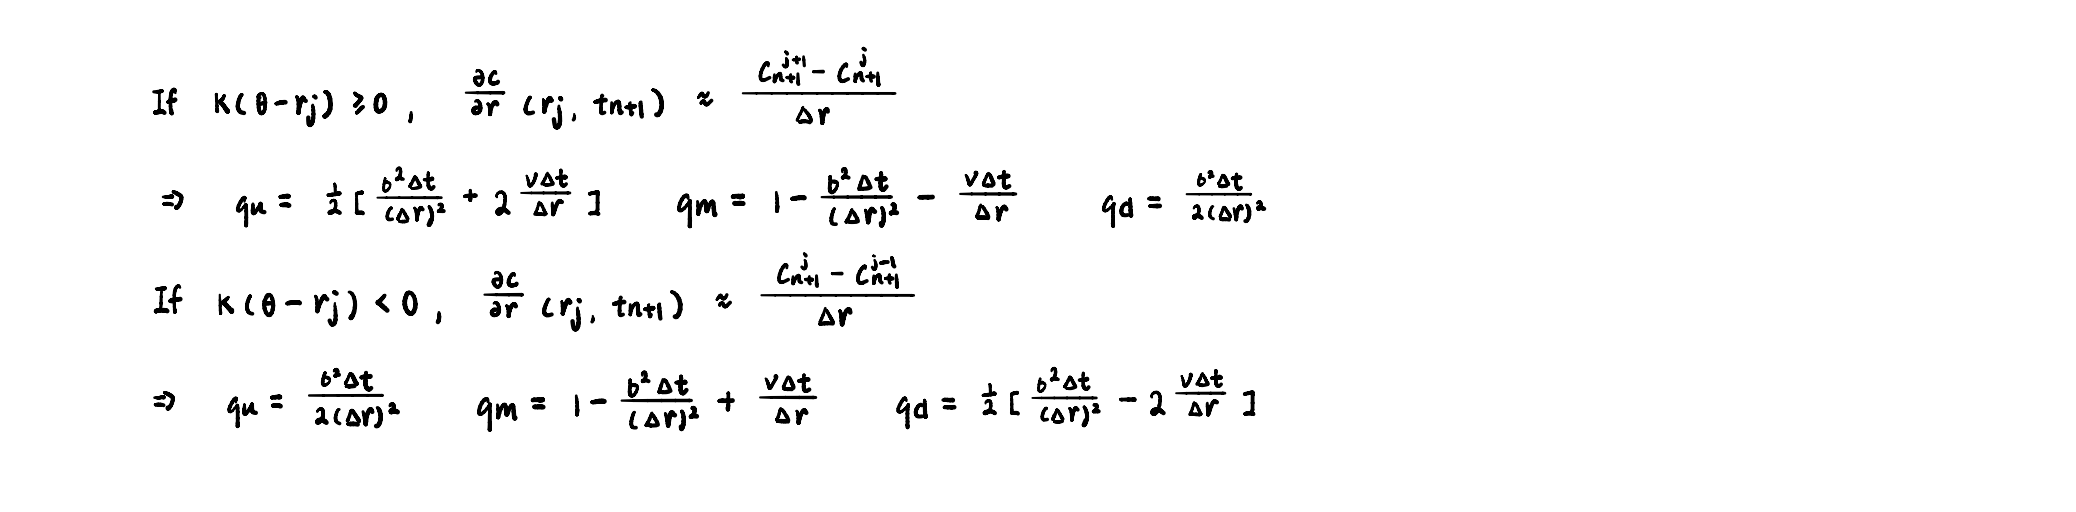

In [158]:
hw3FD2 = FDexplicit(rMax=0.35,rMin=-0.25,deltar=0.01,deltat=0.01,useUpwind=True)

(r, bondprice) = hw3FD2.price_bond_vasicek(hw3contract,hw3dynamics)

np.set_printoptions(precision=4,suppress=True)
displayrows=(r<0.15+hw3FD2.deltar/2) & (r>0.0-hw3FD2.deltar/2)

upwind = np.stack((r, bondprice),1)[displayrows]
print(upwind)

[[ 0.15    0.7536]
 [ 0.14    0.7561]
 [ 0.13    0.7586]
 [ 0.12    0.7611]
 [ 0.11    0.7637]
 [ 0.1     0.7662]
 [ 0.09    0.7688]
 [ 0.08    0.7713]
 [ 0.07    0.7739]
 [ 0.06    0.7765]
 [ 0.05    0.7791]
 [ 0.04    0.7817]
 [ 0.03    0.7843]
 [ 0.02    0.7869]
 [ 0.01    0.7895]
 [-0.      0.7922]]


##### **(d)**

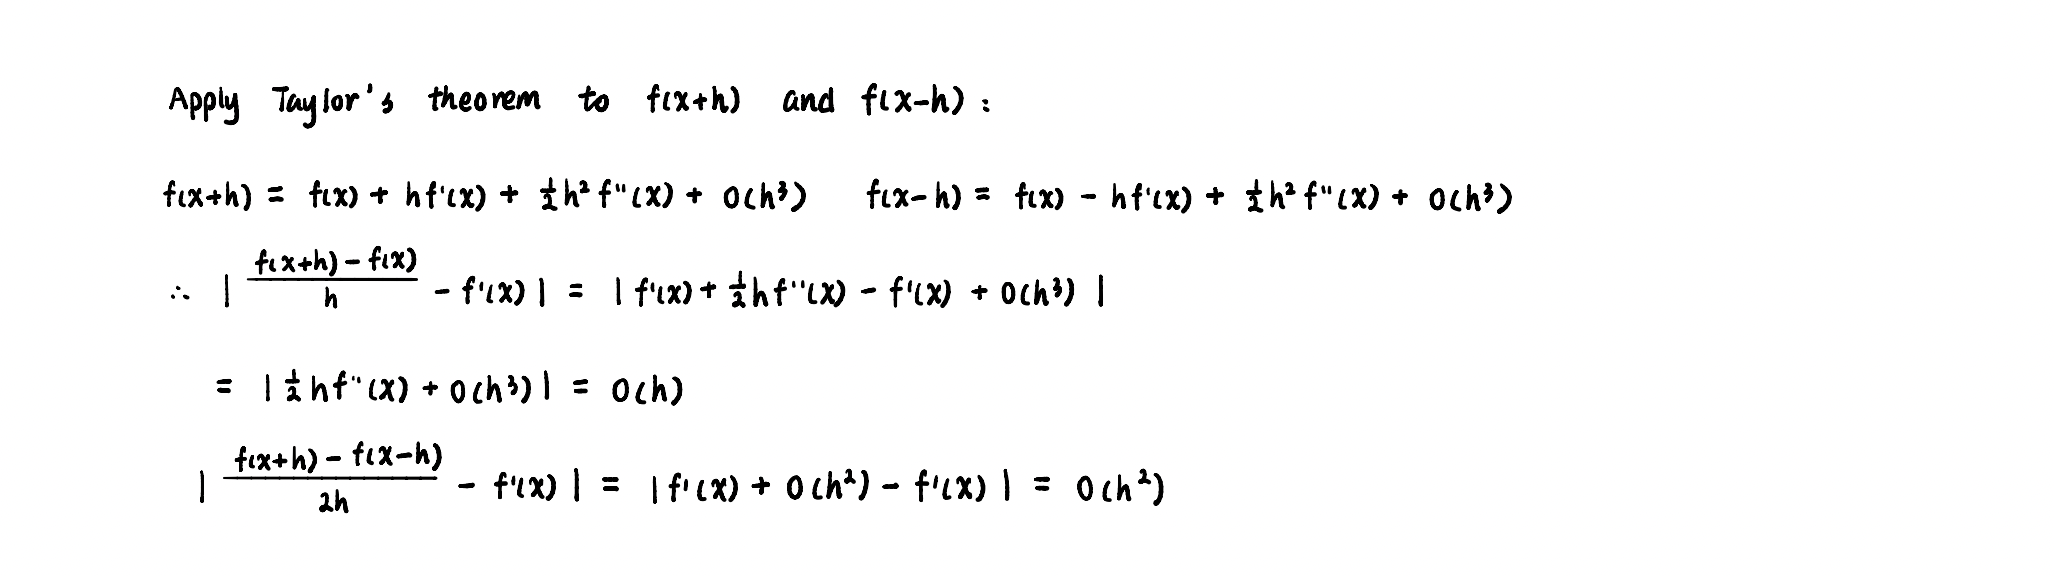

##### **(e)**

In [159]:
r0 = 0.1

Central-difference calculation of the bond price for r0 = 0.10.

In [176]:
index = np.where(abs(central_difference[:,0] - r0) <= 1e-8)[0][0]
central_difference[index][1]

3296.5929237489718

Upwind calculation of the bond price for r0 = 0.10.

In [177]:
index = np.where(abs(upwind[:,0] - r0) <= 1e-8)[0][0]
upwind[index][1]

0.7662252882450523

Upwind calculation of the bond price is more accurate.

##### **(f)**

Ignoring stability issues and considering only consistency (i.e. “truncation error,” also known as “local discretization error”), the upwind explicit scheme, which uses one-sided spatial differences, discretizes the PDE with **less** accuracy than the standard explicit scheme, which uses central spatial differences.

However, to actually guarantee convergence, the grid spacing must satisfy certain stability constraints. In a PDE exhibiting strong drift, we have just seen that these constraints may allow the upwind scheme **greater** freedom in choosing grid spacing, compared to the standard scheme.

##### **(g)**

In [180]:
P_T = 1
T = 5
t = 0

In [185]:
r0 = 0.12
index = np.where(abs(upwind[:,0] - r0) <= 1e-8)[0][0]
P_t = upwind[index][1]

yield_ = np.log(abs(P_T/P_t))/(T-t)

print("The yield-to-maturity of a 5-year discount bond in the case that r0 = 0.12 is " + str(round(yield_, 4)) + ".")

The yield-to-maturity of a 5-year discount bond in the case that r0 = 0.12 is 0.0546.


In [186]:
r0 = 0.02
index = np.where(abs(upwind[:,0] - r0) <= 1e-8)[0][0]
P_t = upwind[index][1]

yield_ = np.log(abs(P_T/P_t))/(T-t)

print("The yield-to-maturity of a 5-year discount bond in the case that r0 = 0.02 is " + str(round(yield_, 4)) + ".")

The yield-to-maturity of a 5-year discount bond in the case that r0 = 0.02 is 0.0479.


The reason why intuitively the yield for r0 = 0.12 is smaller than 0.12, whereas the yield for r0 = 0.02 is greater than 0.02 is that &theta; = 0.05. When interest rates are above their long-term average, they are likely to fall back towards the average, and when they are below their long-term average, they are likely to rise back towards the average. 

As a result, when r0 = 0.12 > &theta;, the yield for r0 = 0.12 will be smaller than 0.12, reflecting the expectation that interest rates will decrease and bond prices will increase over time. Conversely, the yield for r0 = 0.02 < &theta; will be greater than 0.02.

# Problem 2

##### **(a)**

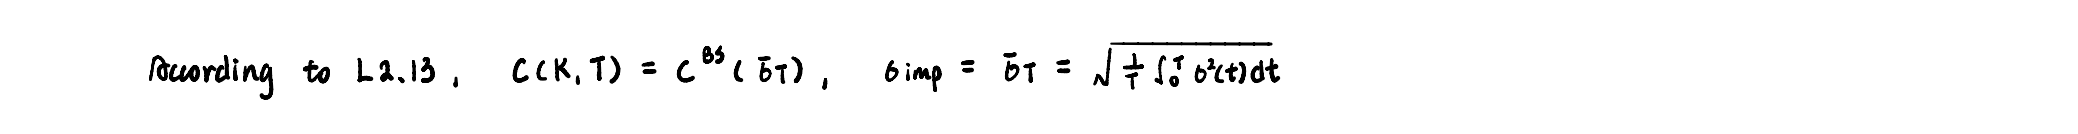

The function is with respect to T, but not K. As a result, the dynamics are capable of generating a non-constant term-structure of implied volatility, but not capable of generating an implied volatility skew.

##### **(b)**

In [195]:
from scipy.stats import norm
from scipy.optimize import bisect, brentq

class GBMdynamics: 
    
    def __init__(self, S, r, rGrow, sigma=None):

        self.S = S
        self.r = r
        self.rGrow = rGrow
        self.sigma = sigma
        
    def update_sigma(self, sigma):
        
        self.sigma = sigma
        return self

class CallOption:
    
    def __init__(self, K, T, price=None):

        self.K = K
        self.T = T
        self.price = price

    def BSprice(self, dynamics):
       
        F = dynamics.S*np.exp(dynamics.rGrow*self.T)
        sd = dynamics.sigma*np.sqrt(self.T)
        d1 = np.log(F/self.K)/sd+sd/2
        d2 = d1-sd

        return np.exp(-dynamics.r*self.T)*(F*norm.cdf(d1)-self.K*norm.cdf(d2))

    def BSprice_f(self, S, K, T, r,rGrow, sigma):

        F = S*np.exp(rGrow*T)
        sd = sigma*np.sqrt(T)
        d1 = np.log(F/K)/sd+sd/2
        d2 = d1-sd

        return np.exp(-r*T)*(F*norm.cdf(d1)-K*norm.cdf(d2))

    def IV(self, dynamics):
                
        if self.price is None: 
            raise ValueError('Contract price must be given')
    
        df = np.exp(-dynamics.r*self.T)  #discount factor
        F = dynamics.S / df
        lowerbound = np.max([0,(F-self.K)*df])

        C = self.price

        if C<lowerbound:
            return np.nan
        if C==lowerbound:
            return 0
        if C>=F*df:
            return np.nan 

        dytry = dynamics
        dytry.sigma = 0.2

        while self.BSprice(dytry)>C:
            dytry.sigma /= 2
        while self.BSprice(dytry)<C:
            dytry.sigma *= 2
            
        hi = dytry.sigma
        lo = hi/2
        
        impliedVolatility = bisect(lambda x: self.BSprice_f(dynamics.S, self.K, self.T, dynamics.r, dynamics.rGrow, x) - C, lo, hi)     
        
        return impliedVolatility

In [205]:
contract1 = CallOption(K = 100, T = 0.1, price = 5.25)
dynamics1 = GBMdynamics(S = 100, r = 0.05, rGrow = 0.05)
vol1 = contract1.IV(dynamics1)

print("Black-Scholes implied volatility of the 0.1-expiry call with 5.25 time-0 price is " + str(round(vol1,7)) + ".")

Black-Scholes implied volatility of the 0.1-expiry call with 5.25 time-0 price is 0.3973204.


In [206]:
contract2 = CallOption(K = 100, T = 0.2, price = 7.25)
dynamics2 = GBMdynamics(S = 100, r = 0.05, rGrow = 0.05)
vol2 = contract2.IV(dynamics2)

print("Black-Scholes implied volatility of the 0.2-expiry call with 7.25 time-0 price is " + str(round(vol2,7)) + ".")

Black-Scholes implied volatility of the 0.2-expiry call with 7.25 time-0 price is 0.3801713.


In [207]:
contract3 = CallOption(K = 100, T = 0.5, price = 9.5)
dynamics3 = GBMdynamics(S = 100, r = 0.05, rGrow = 0.05)
vol3 = contract3.IV(dynamics3)

print("Black-Scholes implied volatility of the 0.5-expiry call with 9.5 time-0 price is " + str(round(vol3,7)) + ".")

Black-Scholes implied volatility of the 0.5-expiry call with 9.5 time-0 price is 0.2950973.


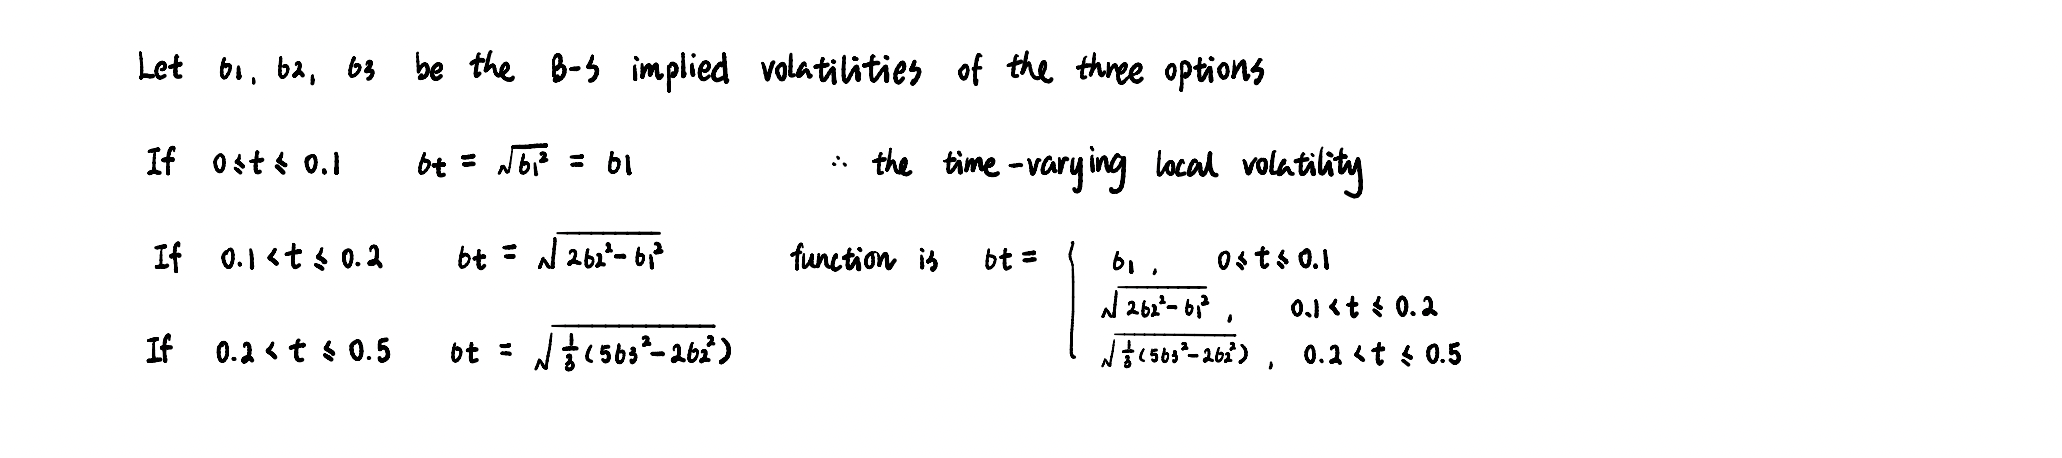

##### **(c)**

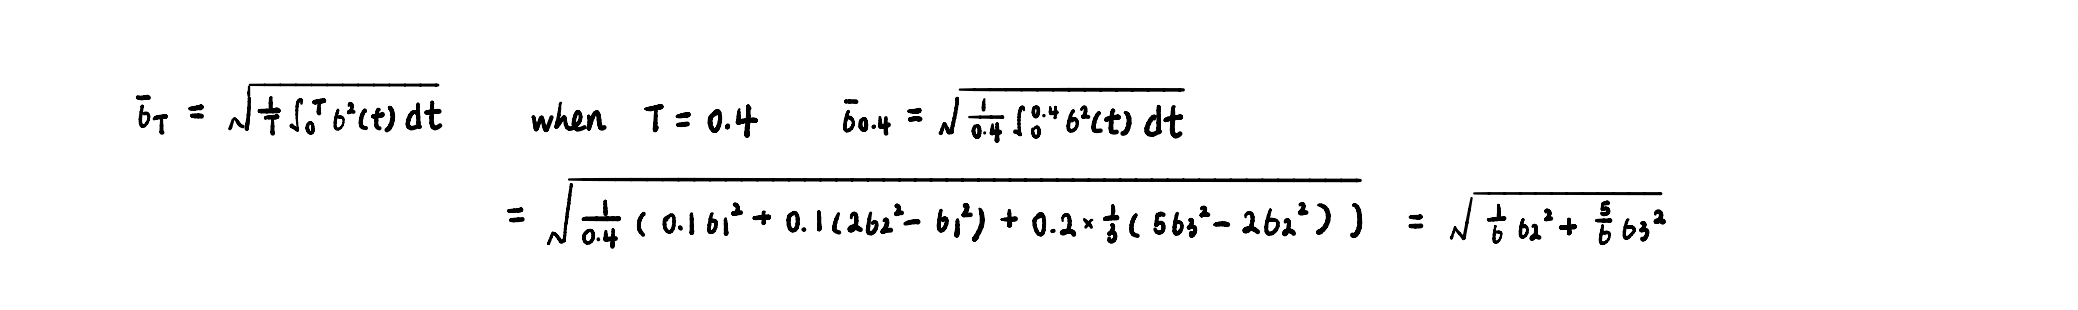

In [212]:
vol4 = np.sqrt((1/6)*vol2**2 + (5/6)*vol3**2)

contract4 = CallOption(K = 100, T = 0.4)
dynamics4 = GBMdynamics(S = 100, r = 0.05, rGrow = 0.05,sigma = vol4)

price4 = contract4.BSprice(dynamics4)

print("The time-0 price of an at-the-money European call with expiry 0.4 is " + str(round(price4,7)) + ".")

The time-0 price of an at-the-money European call with expiry 0.4 is 8.7842018.
